In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import pyplot

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Paulo\Documents\GitHub\CD\Projeto 1


In [3]:
dados = pd.read_csv("PES2014.csv", sep=",")

In [4]:
dados.head()

,Unnamed: 0,V0101,UF,V0102,V0103,V0301,V0302,V3031,V3032,V3033,...,V4741,V4742,V4743,V4745,V4746,V4747,V4748,V4749,V4750,V9993
0,0,2014,11,15,1,1,2,19,8,1987,...,3.0,500.0,3.0,3,1.0,2.0,2.0,1.0,500.0,20160623
1,1,2014,11,15,1,2,4,19,1,1986,...,3.0,500.0,3.0,4,2.0,NaN,2.0,1.0,500.0,20160623
2,2,2014,11,15,1,3,2,14,5,2013,...,3.0,500.0,3.0,1,NaN,NaN,NaN,NaN,500.0,20160623
3,3,2014,11,15,2,1,2,8,4,1963,...,2.0,1150.0,4.0,2,1.0,2.0,2.0,1.0,1150.0,20160623
4,4,2014,11,15,2,2,4,6,11,1970,...,2.0,1150.0,4.0,3,1.0,2.0,2.0,1.0,1150.0,20160623


In [5]:


"""
dados:

V6007 = Curso mais elevado que frequentou anteriormente
V4728 = area urbana,rural

dados = dados[dados.renda < 100000]
dados = dados[~ dados.x.isnull()] tira todos os null de x

"""


'\ndados:\n\nV6007 = Curso mais elevado que frequentou anteriormente\nV4728 = area urbana,rural\n\ndados = dados[dados.renda < 100000]\ndados = dados[~ dados.x.isnull()] tira todos os null de x\n\n'

In [6]:
dados.estado = dados.iloc[:,2]
dados.aposentados = dados.V9122.astype('category') #2 sim, 4 não
dados.sexo = dados.V0302.astype('category') #2 mas, 4 fem
dados.curso = dados.V6007.astype('category')
dados.idade = dados.V8005.astype('float')

dados.renda = dados.V1022.astype('float')
dados.renda = dados.renda[dados.renda < 500000]

dados.aposentados2 = dados.aposentados == 2

In [7]:

"""

dados.regiao = dados.V4728.astype('category')

dados["zona"] = dados.regiao

dados.zona[(dados.regiao == 1 )| (dados.regiao == 2 )| (dados.regiao == 3 )| (dados.regiao == 35)] = 'Urbano'
dados.zona[(dados.regiao == 4 )| (dados.regiao == 5 )| (dados.regiao == 6 )| (dados.regiao == 7) | (dados.regiao == 8)] = 'Rural'
"""

'\n\ndados.regiao = dados.V4728.astype(\'category\')\n\ndados["zona"] = dados.regiao\n\ndados.zona[(dados.regiao == 1 )| (dados.regiao == 2 )| (dados.regiao == 3 )| (dados.regiao == 35)] = \'Urbano\'\ndados.zona[(dados.regiao == 4 )| (dados.regiao == 5 )| (dados.regiao == 6 )| (dados.regiao == 7) | (dados.regiao == 8)] = \'Rural\'\n'

In [8]:
k = 110/10
a = (109.0 - 0) / k
#print(k)
dados.renda.mas = dados.renda[dados.sexo == 2]
dados.renda.fem = dados.renda[dados.sexo == 4]


faixa_r =  np.arange(0,3000,100)
#print(len(faixa))

variável_renda_mas= pd.cut(dados.renda.mas, faixa_r)
variável_renda_fem= pd.cut(dados.renda.fem, faixa_r)

x = variável_renda_mas.value_counts(True)*1000

x.round(decimals=0)

x = variável_renda_fem.value_counts(True)*1000

x.round(decimals=0)

(700, 800]      120.0
(0, 100]        104.0
(200, 300]       94.0
(100, 200]       89.0
(900, 1000]      68.0
(300, 400]       57.0
(400, 500]       52.0
(1400, 1500]     47.0
(1100, 1200]     42.0
(1900, 2000]     36.0
(800, 900]       26.0
(600, 700]       26.0
(2400, 2500]     21.0
(1000, 1100]     16.0
(500, 600]       16.0
(1500, 1600]     10.0
(1300, 1400]     10.0
(2300, 2400]      5.0
(2200, 2300]      5.0
(2000, 2100]      5.0
(1200, 1300]      5.0
(2700, 2800]      5.0
(1600, 1700]      5.0
(2800, 2900]      5.0
(2100, 2200]      0.0
(1700, 1800]      0.0
(1800, 1900]      0.0
(2500, 2600]      0.0
(2600, 2700]      0.0
dtype: float64

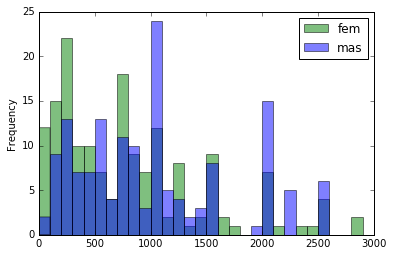

In [9]:


plot = dados.renda.fem.plot.hist(bins=faixa_r,color = "green",label = 'fem',alpha=0.5)
plot = dados.renda.mas.plot.hist(bins=faixa_r,color = "blue",label = 'mas',alpha=0.5)

pyplot.legend(loc='upper right')

In [10]:
ct = pd.crosstab(dados.curso,dados.sexo[dados.aposentados == 2],margins=True,rownames=['Estado'], colnames=['cor'])


ct.columns = ['masculino',
'feminino',
'All']

ct.index = ['Elementar (primário)',
'Médio 1º ciclo (ginasial, etc.)',
'Médio 2º ciclo (científico, clássico, etc.)',
'Regular do ensino fundamental ou do 1º grau',
'Regular do ensino médio ou do 2º grau',
'Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau',
'Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau',
'Superior de graduação',
'Mestrado ou doutorado',
'Alfabetização de jovens e adultos',
'Creche',
'Classe de alfabetização - CA',
'Maternal, jardim de infância etc',
'All']


ct

,masculino,feminino,All
Elementar (primário),7521,7292,30971
"Médio 1º ciclo (ginasial, etc.)",1458,1250,6114
"Médio 2º ciclo (científico, clássico, etc.)",1038,1172,3797
Regular do ensino fundamental ou do 1º grau,1593,1294,66473
Regular do ensino médio ou do 2º grau,1513,1462,76841
Educação de jovens e adultos ou supletivo do ensino fundamental ou do 1º grau,197,277,2890
Educação de jovens e adultos ou supletivo de ensino médio ou do 2º grau,206,212,4497
Superior de graduação,1843,2556,33990
Mestrado ou doutorado,123,126,1666
Alfabetização de jovens e adultos,143,168,806


In [11]:
dados.idade[dados.aposentados == 2].describe()

count    38643.000000
mean        67.386952
std         10.574217
min         11.000000
25%         61.000000
50%         67.000000
75%         74.000000
max        112.000000
Name: V8005, dtype: float64

In [12]:
k = 110/10
a = (109.0 - 0) / k
#print(a)

faixa =  np.arange(10,111,10)
#print(faixa)

variável_idade= pd.cut(dados.idade[dados.aposentados == 2], faixa)

x = variável_idade.value_counts(True)*100

x.round(decimals=0)

(60, 70]      40.0
(70, 80]      26.0
(50, 60]      19.0
(80, 90]       9.0
(40, 50]       3.0
(90, 100]      1.0
(30, 40]       1.0
(20, 30]       0.0
(10, 20]       0.0
(100, 110]     0.0
dtype: float64

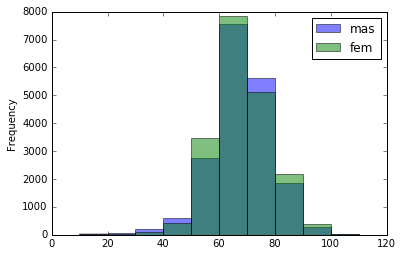

In [13]:
idade_opos = dados.idade[dados.aposentados2]

plot = idade_opos[dados.sexo == 2].plot.hist(bins=faixa,color = "blue",label = 'mas',alpha=0.5)
plot = idade_opos[dados.sexo == 4].plot.hist(bins=faixa,color = "green",label = 'fem',alpha=0.5)
pyplot.legend(loc='upper right')

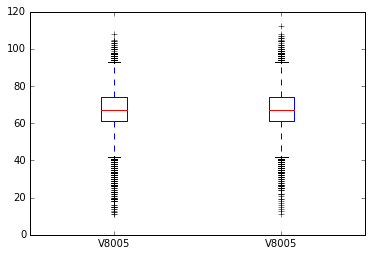

In [18]:
dados.idade_sexo = pd.DataFrame([idade_opos[dados.sexo == 2],idade_opos[dados.sexo == 4]])

dados.idade_sexo = dados.idade_sexo.T


dados.idade_sexo.plot.box()